In [13]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [14]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [15]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

In [16]:
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((240, 4096), (240,), (160, 4096), (160,))

In [17]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)

In [18]:
train_y.shape , test_y.shape

((240, 40), (160, 40))

In [19]:
train_X = train_X.reshape(240,64,64)
test_X = test_X.reshape(160,64,64)

In [20]:
train_X = train_X[:, :,:, np.newaxis].astype('float32')
test_X = test_X[:, :,:,np.newaxis].astype('float32')

In [21]:
train_X.shape , test_X.shape

((240, 64, 64, 1), (160, 64, 64, 1))

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2


model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(64, 64, 1), kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())

model1.add(Conv2D(40, (5, 5), activation='relu', input_shape=(64, 64, 1), kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())


model1.add(Flatten())
model1.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [66]:
model1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 60, 60, 32)        832       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 40)        32040     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 40)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 40)                270440    
Total params: 303,312
Trainable params: 303,312
Non-trainable params: 0
_________________________________________________________________


In [67]:
# %%time
hist1 = model1.fit(train_X, train_y, epochs=200, batch_size=500, validation_data=(test_X, test_y), verbose=2)

Train on 240 samples, validate on 160 samples
Epoch 1/200
 - 2s - loss: 3.6972 - acc: 0.0333 - val_loss: 3.7609 - val_acc: 0.0125
Epoch 2/200
 - 1s - loss: 3.6485 - acc: 0.0458 - val_loss: 3.8445 - val_acc: 0.0063
Epoch 3/200
 - 1s - loss: 3.6297 - acc: 0.0375 - val_loss: 3.7093 - val_acc: 0.0375
Epoch 4/200
 - 1s - loss: 3.6217 - acc: 0.0875 - val_loss: 3.8673 - val_acc: 0.0063
Epoch 5/200
 - 1s - loss: 3.5893 - acc: 0.0500 - val_loss: 3.6065 - val_acc: 0.0812
Epoch 6/200
 - 1s - loss: 3.6118 - acc: 0.0792 - val_loss: 3.8664 - val_acc: 0.0562
Epoch 7/200
 - 1s - loss: 3.5494 - acc: 0.1500 - val_loss: 3.5647 - val_acc: 0.1000
Epoch 8/200
 - 1s - loss: 3.5808 - acc: 0.1167 - val_loss: 3.8891 - val_acc: 0.0312
Epoch 9/200
 - 1s - loss: 3.5491 - acc: 0.1042 - val_loss: 3.5499 - val_acc: 0.0938
Epoch 10/200
 - 1s - loss: 3.5819 - acc: 0.1167 - val_loss: 3.6955 - val_acc: 0.0188
Epoch 11/200
 - 1s - loss: 3.4147 - acc: 0.0750 - val_loss: 3.5095 - val_acc: 0.1375
Epoch 12/200
 - 1s - loss: 3

Epoch 97/200
 - 1s - loss: 0.0169 - acc: 1.0000 - val_loss: 0.5390 - val_acc: 0.8562
Epoch 98/200
 - 1s - loss: 0.0164 - acc: 1.0000 - val_loss: 0.5377 - val_acc: 0.8562
Epoch 99/200
 - 1s - loss: 0.0159 - acc: 1.0000 - val_loss: 0.5370 - val_acc: 0.8562
Epoch 100/200
 - 1s - loss: 0.0154 - acc: 1.0000 - val_loss: 0.5359 - val_acc: 0.8562
Epoch 101/200
 - 1s - loss: 0.0149 - acc: 1.0000 - val_loss: 0.5351 - val_acc: 0.8562
Epoch 102/200
 - 1s - loss: 0.0145 - acc: 1.0000 - val_loss: 0.5342 - val_acc: 0.8562
Epoch 103/200
 - 1s - loss: 0.0141 - acc: 1.0000 - val_loss: 0.5334 - val_acc: 0.8562
Epoch 104/200
 - 1s - loss: 0.0137 - acc: 1.0000 - val_loss: 0.5325 - val_acc: 0.8625
Epoch 105/200
 - 1s - loss: 0.0134 - acc: 1.0000 - val_loss: 0.5318 - val_acc: 0.8625
Epoch 106/200
 - 1s - loss: 0.0130 - acc: 1.0000 - val_loss: 0.5310 - val_acc: 0.8625
Epoch 107/200
 - 1s - loss: 0.0127 - acc: 1.0000 - val_loss: 0.5303 - val_acc: 0.8625
Epoch 108/200
 - 1s - loss: 0.0124 - acc: 1.0000 - val_lo

Epoch 193/200
 - 1s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4863 - val_acc: 0.8813
Epoch 194/200
 - 1s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.4856 - val_acc: 0.8813
Epoch 195/200
 - 1s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.4855 - val_acc: 0.8813
Epoch 196/200
 - 1s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4847 - val_acc: 0.8813
Epoch 197/200
 - 1s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4847 - val_acc: 0.8813
Epoch 198/200
 - 1s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.4838 - val_acc: 0.8813
Epoch 199/200
 - 1s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.4840 - val_acc: 0.8813
Epoch 200/200
 - 1s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.4827 - val_acc: 0.8813


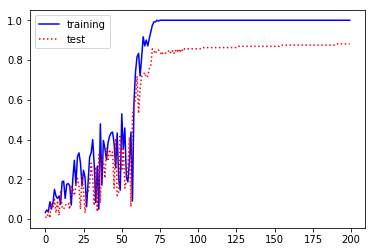

In [68]:
import matplotlib.pylab as plt
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [69]:
np.max(hist1.history['acc']),np.max(hist1.history['val_acc'])

(1.0, 0.8812500238418579)